In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('results/N100-F1000-S100-R100-result-v15.csv')
df.describe()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
count,2700.0,2700.000000,2.700000e+03,2700.000000,2700.000000,2700.000000,2700.000000
mean,-1.0,0.700000,7.991017e+05,283.370028,0.183318,0.236300,498170.823459
std,0.0,0.129123,3.766939e+05,154.501949,0.099395,0.096394,3202.429420
min,-1.0,0.500000,3.396738e+05,92.776058,0.055227,0.108533,490769.486403
25%,-1.0,0.600000,4.916151e+05,160.748877,0.063882,0.120065,496010.962514
50%,-1.0,0.700000,7.009850e+05,242.113916,0.183667,0.240350,497772.717413
75%,-1.0,0.800000,1.032418e+06,365.502686,0.299859,0.345787,500275.707402
max,-1.0,0.900000,1.810368e+06,888.151054,0.320841,0.369764,507182.154191


In [10]:
df.corr()

,correlation,load,v1,v2,disturbance,mean_ca,actual_load
correlation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
load,NaN,1.000000e+00,0.963812,0.851598,1.602540e-18,2.995013e-18,1.018645e-18
v1,NaN,9.638124e-01,1.000000,0.906309,3.435881e-02,3.293551e-02,5.413021e-02
v2,NaN,8.515978e-01,0.906309,1.000000,3.957137e-01,3.946851e-01,2.891445e-02
disturbance,NaN,1.602540e-18,0.034359,0.395714,1.000000e+00,9.991298e-01,-5.198266e-03
mean_ca,NaN,2.995013e-18,0.032936,0.394685,9.991298e-01,1.000000e+00,-1.090694e-02
actual_load,NaN,1.018645e-18,0.054130,0.028914,-5.198266e-03,-1.090694e-02,1.000000e+00


In [11]:
df = df.drop(['v1', 'correlation'], axis=1)

In [12]:
vals = df.drop(['disturbance', 'actual_load', 'mean_ca'], axis=1).groupby(['algorithm', 'load']).median()
vals = vals.unstack(0)
vals.reset_index(inplace=True)
vals.head()

load          v2                        
algorithm                BF          RR        SALP
0          0.50  123.872628  156.015310   95.350333
1          0.55  146.671558  184.912415  112.919123
2          0.60  173.181303  218.806405  133.494156
3          0.65  204.497387  259.202620  157.839406
4          0.70  242.230764  308.384621  187.038735

<AxesSubplot:xlabel='load'>

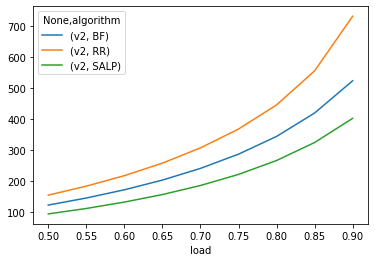

In [13]:
vals.plot(x='load', legend=True)

In [15]:
df.drop(['actual_load', 'load'], axis=1).groupby('algorithm').mean().sort_values('v2')

,v2,disturbance,mean_ca
algorithm,,,
SALP,212.356286,0.062059,0.116864
BF,276.753143,0.183074,0.240102
RR,361.000655,0.304820,0.351934
